# Data exploration

This noteboook explores the original dataset to identify relevant trends and potential features to generate machine learning classification models. All data comes from the Kepler Exoplanet Search Results dataset (https://www.kaggle.com/nasa/kepler-exoplanet-search-results). Further documentation on the specific content of each of the columns can be found here: https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html

The data columns are classified into two different groups:
- Non-categorical: This are features with continuous values. For this category, IQR's are calculated for each feature and a potential outlier count is presented based on this metric.
- Categorical: Every feature containing less than 10 distinct values is labeled as a categorical feature. The value counts of each one of such features is presented in this notebook.

In [18]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Get data from file
url = "resources/exoplanet_data.csv"
data = pd.read_csv(url)
data.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [46]:
# Get column names
for column in data.columns:
    print(f"Feature name: {column}   Distinct value count: {data[column].value_counts().count()}")

Feature name: koi_disposition   Distinct value count: 3
Feature name: koi_fpflag_nt   Distinct value count: 2
Feature name: koi_fpflag_ss   Distinct value count: 2
Feature name: koi_fpflag_co   Distinct value count: 2
Feature name: koi_fpflag_ec   Distinct value count: 2
Feature name: koi_period   Distinct value count: 6991
Feature name: koi_period_err1   Distinct value count: 4105
Feature name: koi_period_err2   Distinct value count: 4105
Feature name: koi_time0bk   Distinct value count: 6978
Feature name: koi_time0bk_err1   Distinct value count: 2302
Feature name: koi_time0bk_err2   Distinct value count: 2302
Feature name: koi_impact   Distinct value count: 1975
Feature name: koi_impact_err1   Distinct value count: 1722
Feature name: koi_impact_err2   Distinct value count: 1499
Feature name: koi_duration   Distinct value count: 6077
Feature name: koi_duration_err1   Distinct value count: 2093
Feature name: koi_duration_err2   Distinct value count: 2093
Feature name: koi_depth   Disti

## Non-categorical features exploration

In [13]:
# Drop non-categorical features (i.e. those with distinct value counts below 10)
non_cat_features = data.drop(["koi_disposition","koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec", "koi_tce_plnt_num"], axis=1)
non_cat_features.head()

,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


Feature name: koi_period
Mean: 56.19124824144902
St. dev.: 117.57096196360938
IQR: 31.662478872999998
Potential outliers: 1121


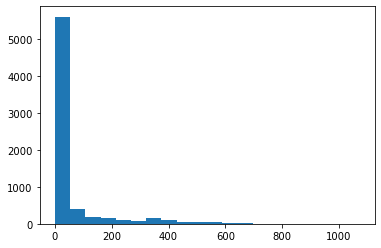

Feature name: koi_period_err1
Mean: 0.0018511224052353058
St. dev.: 0.00718450348337558
IQR: 0.00023509499999999997
Potential outliers: 1226


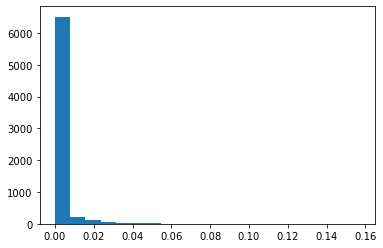

Feature name: koi_period_err2
Mean: -0.0018511224052353058
St. dev.: 0.00718450348337558
IQR: 0.00023509499999999997
Potential outliers: 1226


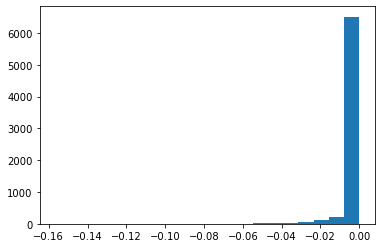

Feature name: koi_time0bk
Mean: 164.48882041055592
St. dev.: 67.02047510983884
IQR: 37.253088399999996
Potential outliers: 723


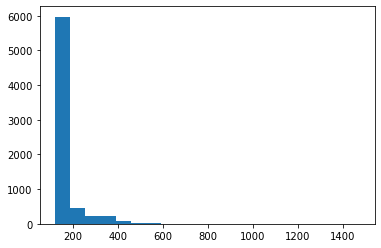

Feature name: koi_time0bk_err1
Mean: 0.009340094821913857
St. dev.: 0.021988970310973233
IQR: 0.008855
Potential outliers: 619


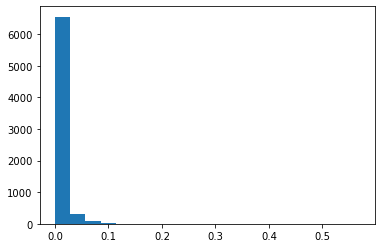

Feature name: koi_time0bk_err2
Mean: -0.009340094821913857
St. dev.: 0.021988970310973233
IQR: 0.008855
Potential outliers: 619


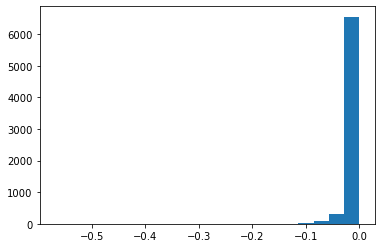

Feature name: koi_impact
Mean: 0.7306305249606626
St. dev.: 3.346955781053012
IQR: 0.6929999999999998
Potential outliers: 56


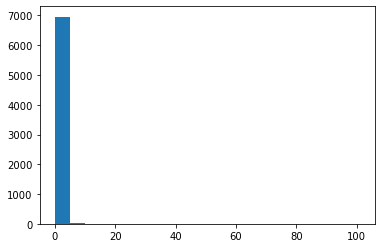

Feature name: koi_impact_err1
Mean: 1.9453677585467086
St. dev.: 9.401850202154035
IQR: 0.3391
Potential outliers: 566


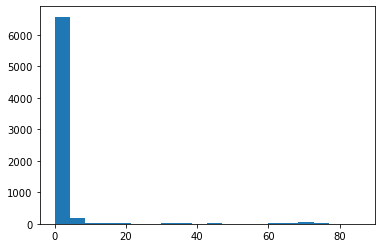

Feature name: koi_impact_err2
Mean: -0.3372426119296233
St. dev.: 1.349035562922965
IQR: 0.402
Potential outliers: 93


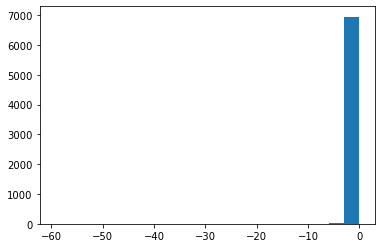

Feature name: koi_duration
Mean: 5.54936826348162
St. dev.: 6.425204918844973
IQR: 3.7515
Potential outliers: 615


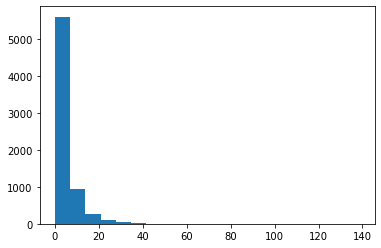

Feature name: koi_duration_err1
Mean: 0.3207152353025319
St. dev.: 0.6653523408951437
IQR: 0.28509999999999996
Potential outliers: 672


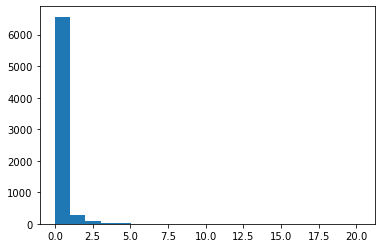

Feature name: koi_duration_err2
Mean: -0.3207152353025319
St. dev.: 0.6653523408951437
IQR: 0.28509999999999996
Potential outliers: 672


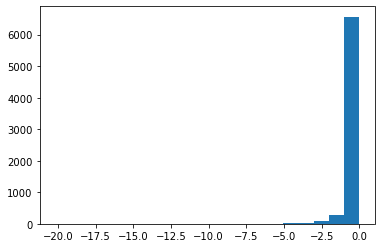

Feature name: koi_depth
Mean: 23911.900615076534
St. dev.: 82412.40287531544
IQR: 1372.85
Potential outliers: 1384


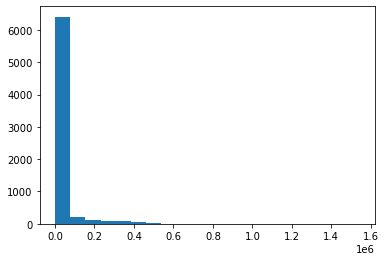

Feature name: koi_depth_err1
Mean: 130.78918609641
St. dev.: 4689.233030492682
IQR: 38.6
Potential outliers: 814


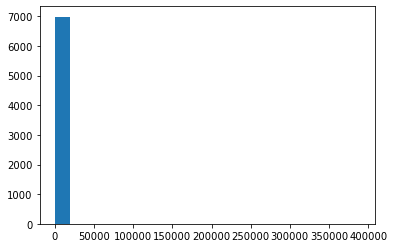

Feature name: koi_depth_err2
Mean: -130.78918609641
St. dev.: 4689.233030492682
IQR: 38.6
Potential outliers: 814


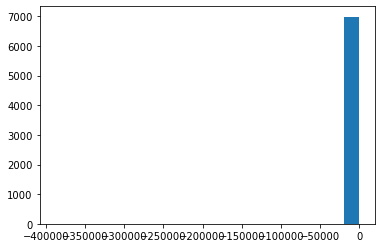

Feature name: koi_prad
Mean: 121.19419253325698
St. dev.: 3519.7376255749
IQR: 14.565
Potential outliers: 1049


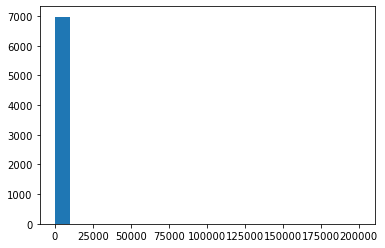

Feature name: koi_prad_err1
Mean: 19.483454441424644
St. dev.: 436.75206442945097
IQR: 2.41
Potential outliers: 1266


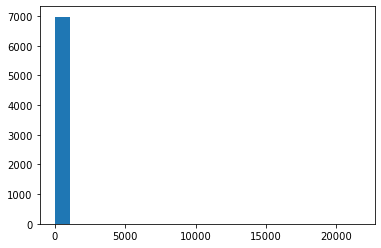

Feature name: koi_prad_err2
Mean: -40.35250894006576
St. dev.: 1366.9393754504613
IQR: 1.94
Potential outliers: 1049


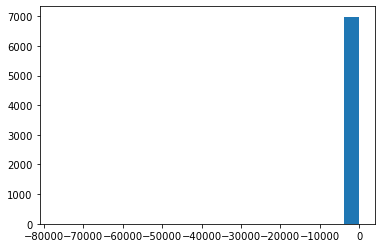

Feature name: koi_teq
Mean: 1095.1527678443713
St. dev.: 856.2348085256953
IQR: 843.5
Potential outliers: 306


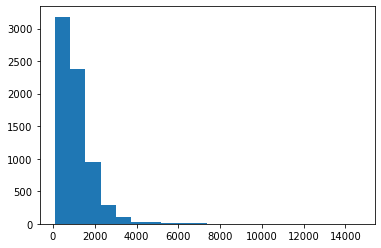

Feature name: koi_insol
Mean: 8263.768509512225
St. dev.: 177525.467654665
IQR: 878.4000000000001
Potential outliers: 1054


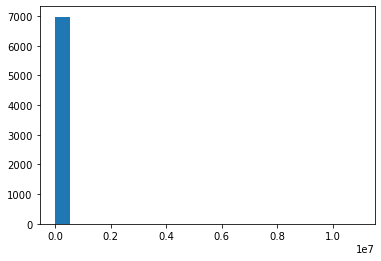

Feature name: koi_insol_err1
Mean: 3599.9179788299243
St. dev.: 56072.70185367019
IQR: 541.565
Potential outliers: 1140


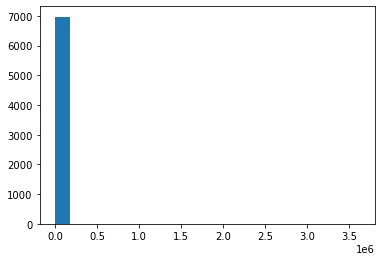

Feature name: koi_insol_err2
Mean: -4302.621497639831
St. dev.: 99248.48198456824
IQR: 300.495
Potential outliers: 1092


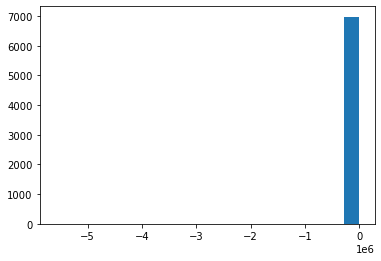

Feature name: koi_model_snr
Mean: 276.0387641253041
St. dev.: 824.7884809936525
IQR: 69.85
Potential outliers: 1228


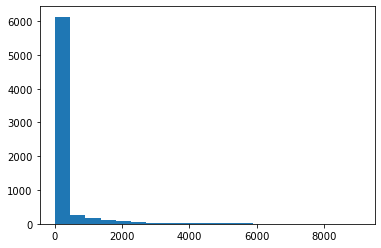

Feature name: koi_steff
Mean: 5700.682448862824
St. dev.: 802.0604045619131
IQR: 813.0
Potential outliers: 409


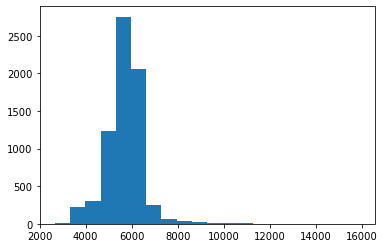

Feature name: koi_steff_err1
Mean: 143.8981547704191
St. dev.: 46.56651139734554
IQR: 69.0
Potential outliers: 52


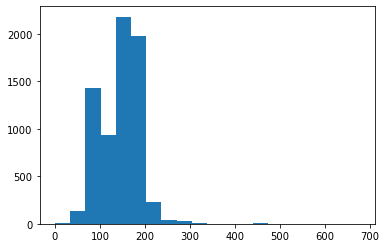

Feature name: koi_steff_err2
Mean: -161.20698040337578
St. dev.: 71.44848129361449
IQR: 85.0
Potential outliers: 141


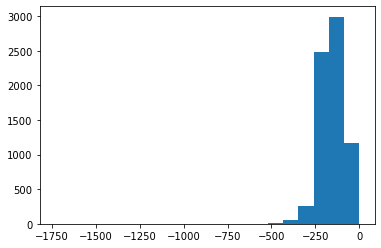

Feature name: koi_slogg
Mean: 4.305049206122168
St. dev.: 0.43923801380520805
IQR: 0.3340000000000005
Potential outliers: 503


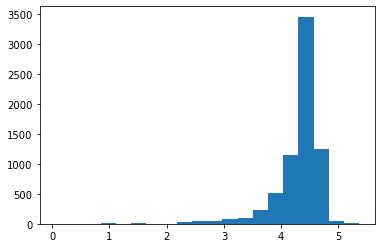

Feature name: koi_slogg_err1
Mean: 0.1210911171506213
St. dev.: 0.13204777767062248
IQR: 0.10499999999999998
Potential outliers: 519


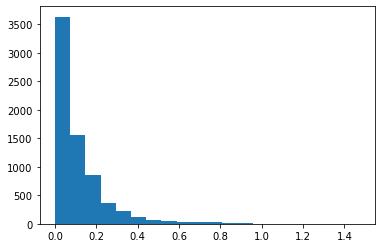

Feature name: koi_slogg_err2
Mean: -0.1404800457731365
St. dev.: 0.08199006095457
IQR: 0.107
Potential outliers: 81


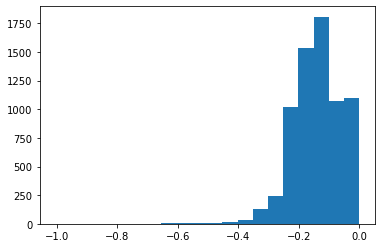

Feature name: koi_srad
Mean: 1.7407485338292106
St. dev.: 5.903414598265669
IQR: 0.5279999999999999
Potential outliers: 766


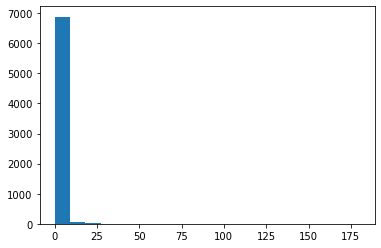

Feature name: koi_srad_err1
Mean: 0.3527103418681165
St. dev.: 0.8390173345151573
IQR: 0.22900000000000004
Potential outliers: 525


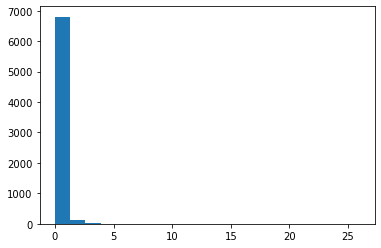

Feature name: koi_srad_err2
Mean: -0.38856758689744086
St. dev.: 1.9077968998644435
IQR: 0.183
Potential outliers: 1000


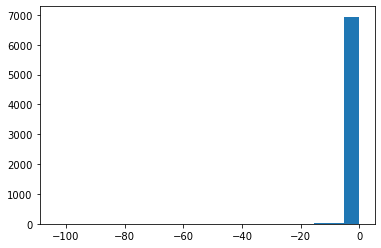

Feature name: ra
Mean: 292.0824059390654
St. dev.: 4.762907551430908
IQR: 7.183819999999969
Potential outliers: 0


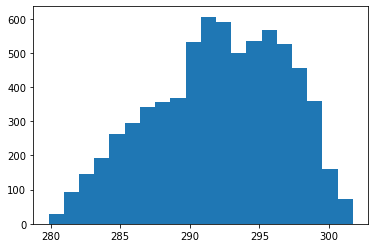

Feature name: dec
Mean: 43.812143163353056
St. dev.: 3.6061673287025346
IQR: 5.895899
Potential outliers: 0


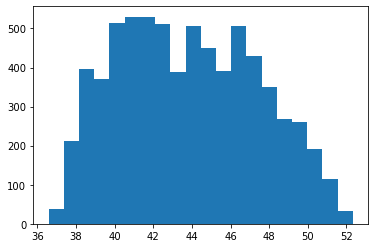

Feature name: koi_kepmag
Mean: 14.27150779573737
St. dev.: 1.3508022796689985
IQR: 1.8670000000000009
Potential outliers: 100


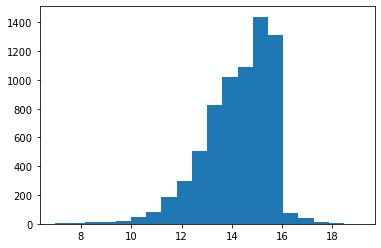

In [48]:
# Declare number of bins and empty arrays to store statistical values
n_bins = 20
columns = []
means = []
stds = []
mins = []
maxs = []
outliers = []

for column in non_cat_features.columns:
    # Calculate stats for each feature
    feature_mean = non_cat_features[column].mean()
    feature_std = non_cat_features[column].std()
    feature_min = non_cat_features[column].min()
    feature_max = non_cat_features[column].max()
    
    # Determine IQR and potential outliers
    quantiles = non_cat_features[column].quantile([0.25, 0.5, 0.75, 1])
    IQR = quantiles[0.75] - quantiles[0.25]
    outlier_set = non_cat_features.loc[(non_cat_features[column] < quantiles[0.25] - 1.5 * IQR) |
                                        (non_cat_features[column] > quantiles[0.75] + 1.5 * IQR), :]
    outlier_count = outlier_set[column].count()
    
    # Append values to sets to generate summary DataFrame
    columns.append(column)
    means.append(feature_mean)
    stds.append(feature_std)
    mins.append(feature_min)
    maxs.append(feature_max)
    outliers.append(outlier_count)
    
    # Print values and display histogram for each feature
    print(f"Feature name: {column}")
    print(f"Mean: {feature_mean}")
    print(f"St. dev.: {non_cat_features[column].std()}")
    print(f"IQR: {IQR}")
    print(f"Potential outliers: {outlier_count}")
    
    plt.hist(non_cat_features[column], bins=n_bins)
    plt.show()


In [54]:
# Generate summary DataFrame for each feature and sort according to outliers in each feature
dict = {'feature': columns, 'mean': means, 'std': stds, 'min': mins, 'max': maxs, 'potential outlier count': outliers}
summary_df = pd.DataFrame(dict)
summary_df = summary_df.sort_values(by = ['potential outlier count'])
summary_df

,feature,mean,std,min,max,potential outlier count
32,ra,292.082406,4.762908,2.798561e+02,3.017208e+02,0
33,dec,43.812143,3.606167,3.657738e+01,5.233601e+01,0
24,koi_steff_err1,143.898155,46.566511,0.000000e+00,6.760000e+02,52
6,koi_impact,0.730631,3.346956,0.000000e+00,1.008060e+02,56
28,koi_slogg_err2,-0.140480,0.081990,-1.007000e+00,0.000000e+00,81
8,koi_impact_err2,-0.337243,1.349036,-5.932000e+01,0.000000e+00,93
34,koi_kepmag,14.271508,1.350802,6.966000e+00,1.906500e+01,100
25,koi_steff_err2,-161.206980,71.448481,-1.733000e+03,0.000000e+00,141
18,koi_teq,1095.152768,856.234809,9.200000e+01,1.466700e+04,306
23,koi_steff,5700.682449,802.060405,2.661000e+03,1.589600e+04,409


## Categorical features exploration

In [55]:
cat_features = data[["koi_disposition","koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec", "koi_tce_plnt_num"]]
cat_features.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_tce_plnt_num
0,CONFIRMED,0,0,0,0,2
1,FALSE POSITIVE,0,1,0,0,1
2,FALSE POSITIVE,0,1,0,0,1
3,CONFIRMED,0,0,0,0,1
4,CONFIRMED,0,0,0,0,2


In [80]:
# Get value counts from categorical field in the DataFrame
for column in cat_features.columns:
    feature = cat_features[column].astype(str)
    print(feature.value_counts())
    

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64
0    5893
1    1098
Name: koi_fpflag_nt, dtype: int64
0    5280
1    1711
Name: koi_fpflag_ss, dtype: int64
0    5572
1    1419
Name: koi_fpflag_co, dtype: int64
0    6117
1     874
Name: koi_fpflag_ec, dtype: int64
1    5903
2     736
3     233
4      71
5      29
6      12
7       6
8       1
Name: koi_tce_plnt_num, dtype: int64
